In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
df['iso_outlier'] = iso_forest.fit_predict(df.drop('target', axis=1))

# KNN
knn = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['knn_outlier'] = knn.fit_predict(df.drop(['target', 'iso_outlier'], axis=1))


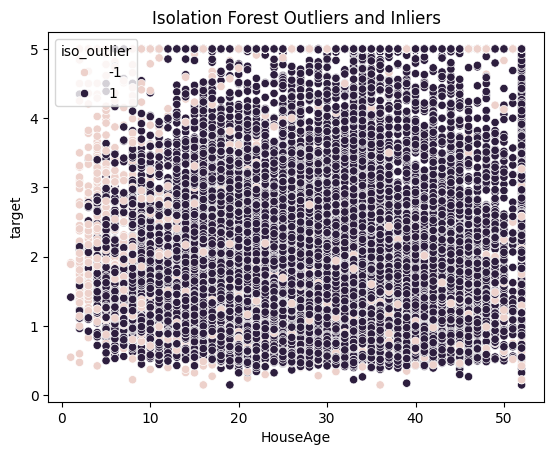

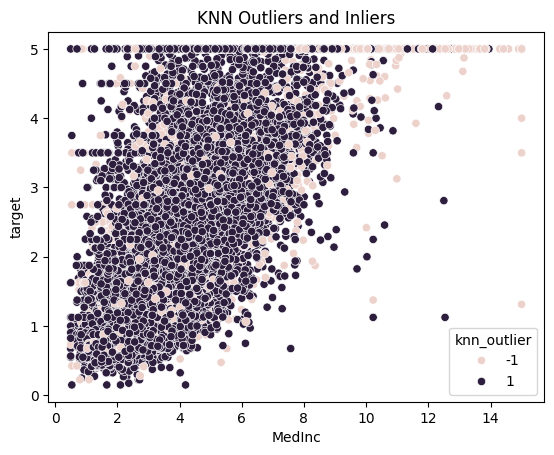

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dot plot for Isolation Forest
sns.scatterplot(x='HouseAge', y='target', hue='iso_outlier', data=df)
plt.title('Isolation Forest Outliers and Inliers')
plt.show()

# Dot plot for KNN
sns.scatterplot(x='MedInc', y='target', hue='knn_outlier', data=df)
plt.title('KNN Outliers and Inliers')
plt.show()


Multiple Linear Regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more predictor variables. Outlier detection methods, such as Isolation Forest and KNN, are unsupervised techniques used to identify anomalies in the data.

The key difference lies in their objectives: Linear Regression focuses on prediction, while outlier detection aims to identify unusual patterns or instances in the data.

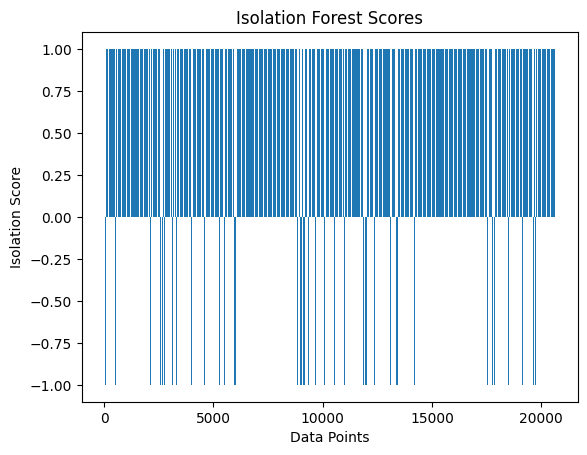

In [8]:
plt.bar(df.index, df['iso_outlier'])
plt.title('Isolation Forest Scores')
plt.xlabel('Data Points')
plt.ylabel('Isolation Score')
plt.show()


In [48]:
#--------------Q2--------------------
import pandas as pd

url_adult = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_arrhythmia = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
url_voting_records = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

# Defining column names for datasets
adult_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
arrhythmia_columns = ['age', 'sex', 'height', 'weight', 'QRS_duration', 'PR_interval', 'QT_interval', 'T_interval', 
                      'P_interval', 'QRS', 'T', 'P', 'QRST', 'J', 'heartrate', 'class']
voting_records_columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 
                          'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

adult_df = pd.read_csv(url_adult, names=adult_columns,header=None, na_values=' ?')
arrhythmia_df = pd.read_csv(url_arrhythmia, header=None, names=arrhythmia_columns, na_values='?')
voting_records_df = pd.read_csv(url_voting_records, header=None, names=voting_records_columns, na_values='?')


In [58]:
voting_records_df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [68]:
adult_df1=adult_df[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]
voting_records_df1=voting_records_df[["infants","water","budget","physician","salvador","religious","satellite","aid","missile","immigration","synfuels","education","superfund","crime","duty_free_exports","eaa_rsa"]]
voting_records_df1['infants'] = voting_records_df1['infants'].map({'y': 1, 'n': 0})
voting_records_df1["water"] = voting_records_df1["water"].map({'y': 1, 'n': 0})
voting_records_df1["budget"] = voting_records_df1["budget"].map({'y': 1, 'n': 0})
voting_records_df1["physician"] = voting_records_df1["physician"].map({'y': 1, 'n': 0})
voting_records_df1["salvador"] = voting_records_df1["salvador"].map({'y': 1, 'n': 0})
voting_records_df1["religious"] = voting_records_df1["religious"].map({'y': 1, 'n': 0})
voting_records_df1['satellite'] = voting_records_df1['satellite'].map({'y': 1, 'n': 0})
voting_records_df1['aid'] = voting_records_df1['aid'].map({'y': 1, 'n': 0})
voting_records_df1['missile'] = voting_records_df1['missile'].map({'y': 1, 'n': 0})
voting_records_df1['immigration'] = voting_records_df1['immigration'].map({'y': 1, 'n': 0})
voting_records_df1['synfuels'] = voting_records_df1['synfuels'].map({'y': 1, 'n': 0})
voting_records_df1['education'] = voting_records_df1['education'].map({'y': 1, 'n': 0})
voting_records_df1['superfund'] = voting_records_df1['superfund'].map({'y': 1, 'n': 0})
voting_records_df1['crime'] = voting_records_df1['crime'].map({'y': 1, 'n': 0})
voting_records_df1['duty_free_exports'] = voting_records_df1['duty_free_exports'].map({'y': 1, 'n': 0})
voting_records_df1['eaa_rsa'] = voting_records_df1['eaa_rsa'].map({'y': 1, 'n': 0})

C:\Users\Dell\AppData\Local\Temp\ipykernel_14812\2074149928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voting_records_df1['infants'] = voting_records_df1['infants'].map({'y': 1, 'n': 0})
C:\Users\Dell\AppData\Local\Temp\ipykernel_14812\2074149928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voting_records_df1["water"] = voting_records_df1["water"].map({'y': 1, 'n': 0})
C:\Users\Dell\AppData\Local\Temp\ipykernel_14812\2074149928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

<Axes: >

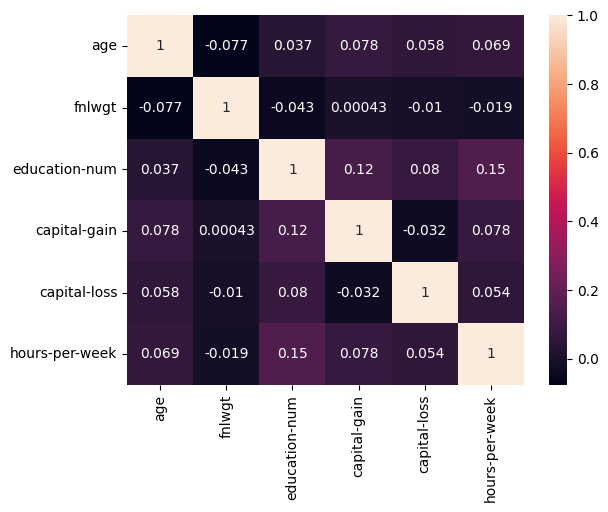

In [54]:
#-----Q2-adult data--------------
import missingno as msno
import seaborn as sns
corr = adult_df1.corr() 
sns.heatmap(corr, annot = True)


From the heatmap of adult data, we see that age and fnlwgt columns are highly correlated as given in dark color.

<Axes: >

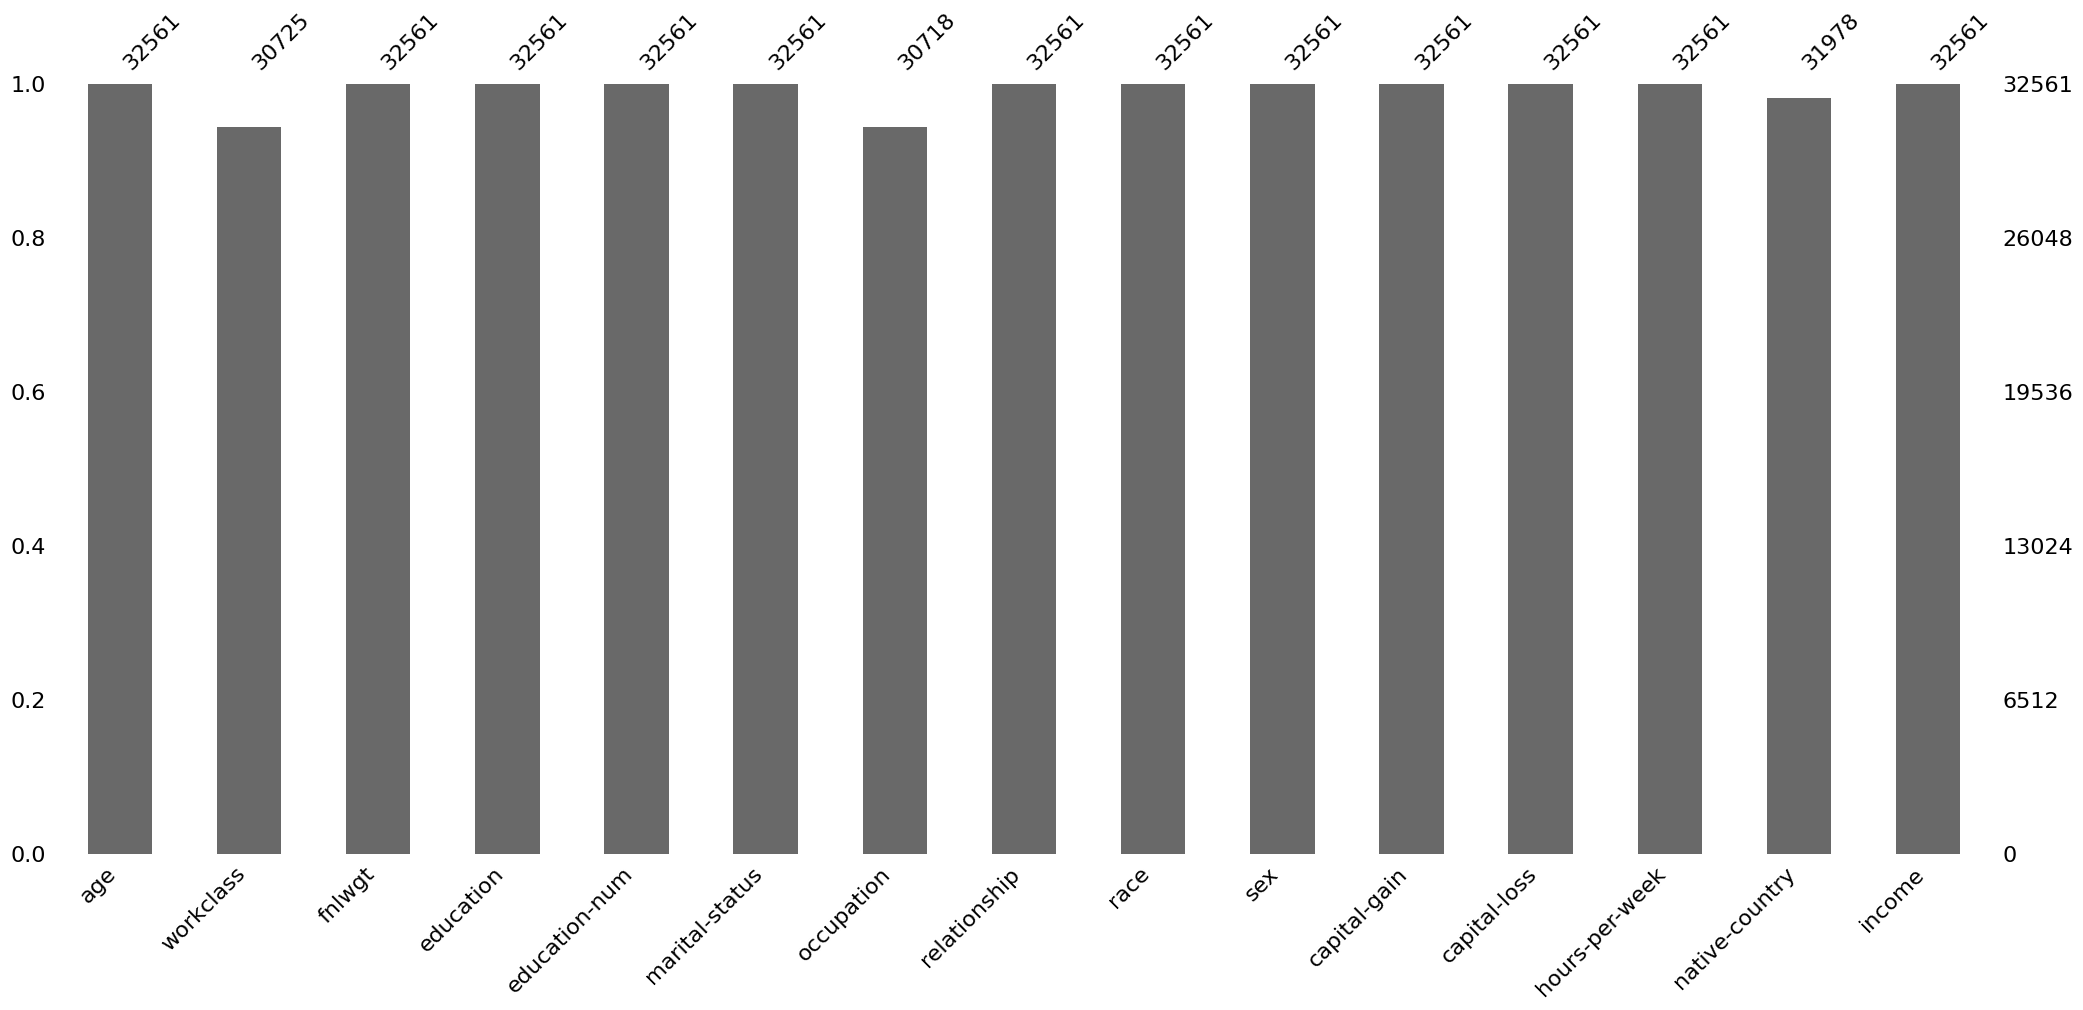

In [55]:
msno.bar(adult_df)


From the adult data bar plpot, since the height of workclass, occupation and native country is less than the others, these columns seem to have missing values.

<Axes: >

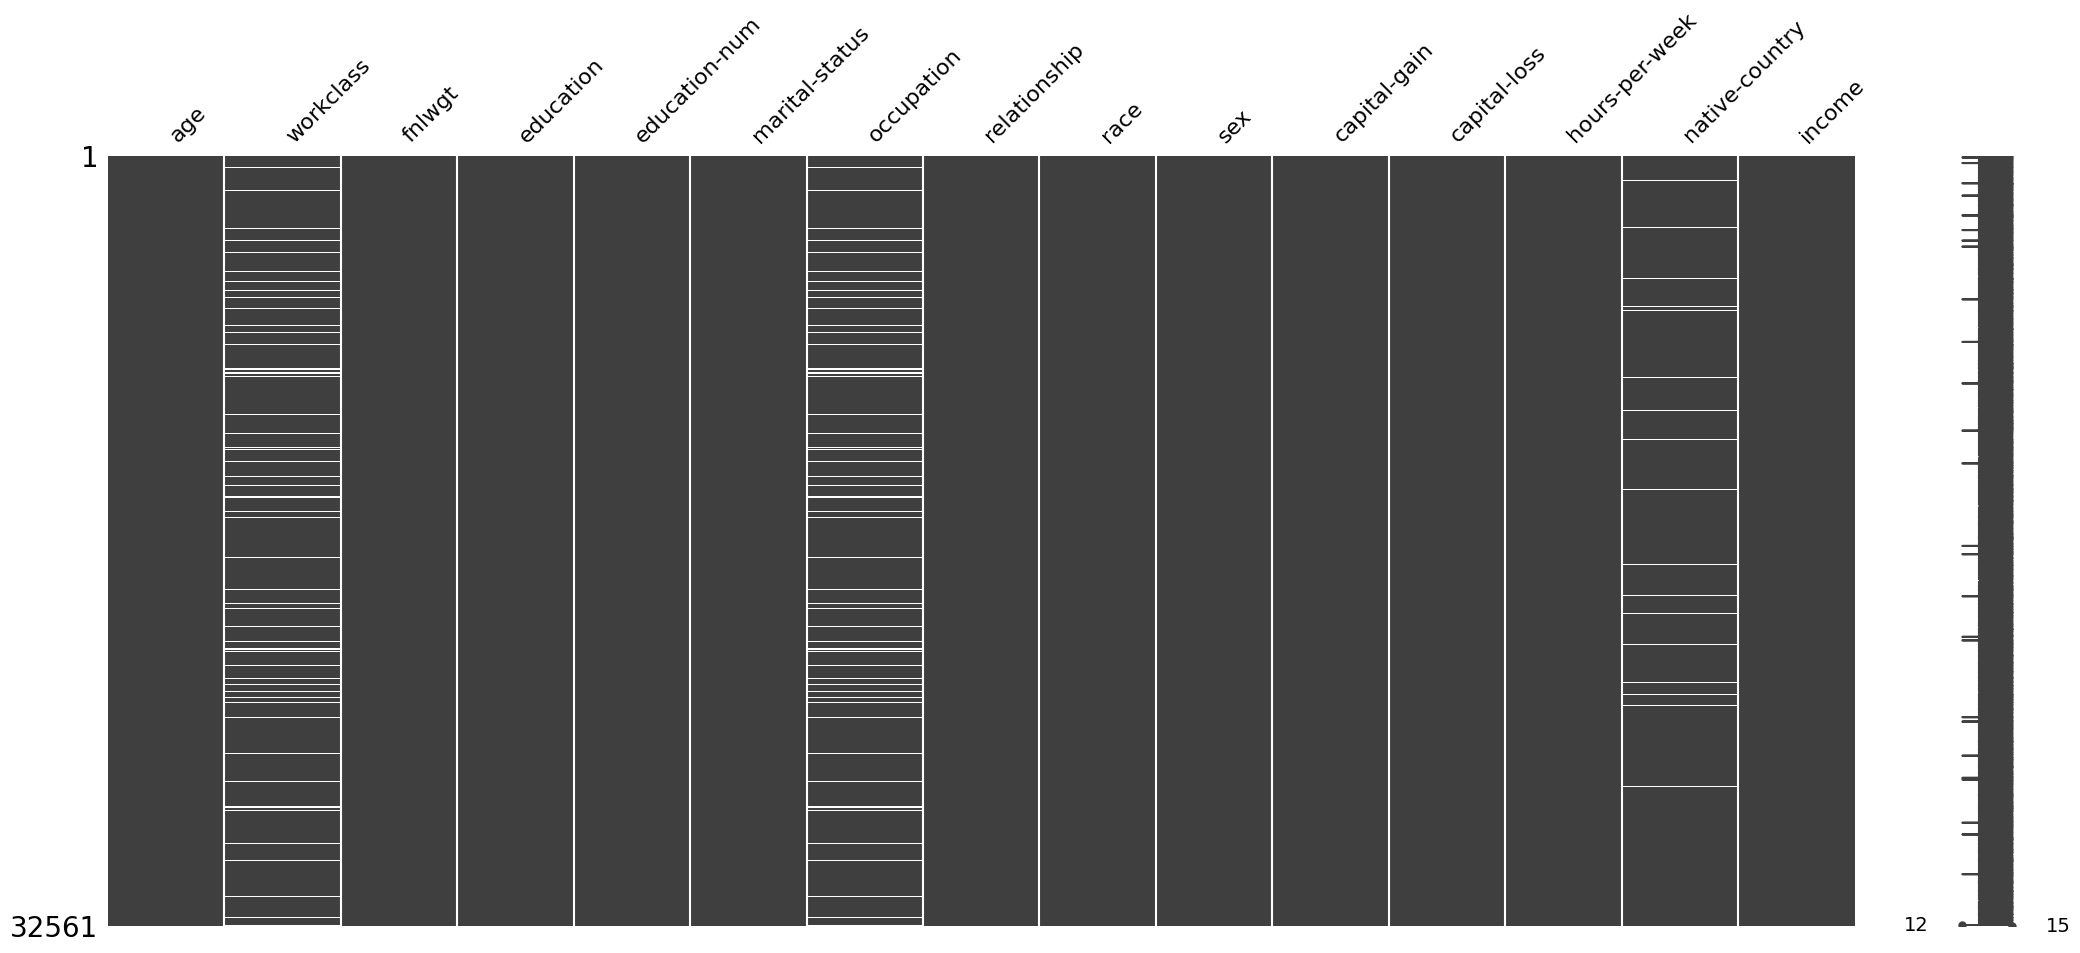

In [56]:
msno.matrix(adult_df) 


From the adult data matrix, workclass, occupation and native countyry seem to have missing values as seen by the horizontal white lines and other columns do not have any missing values.

<Axes: >

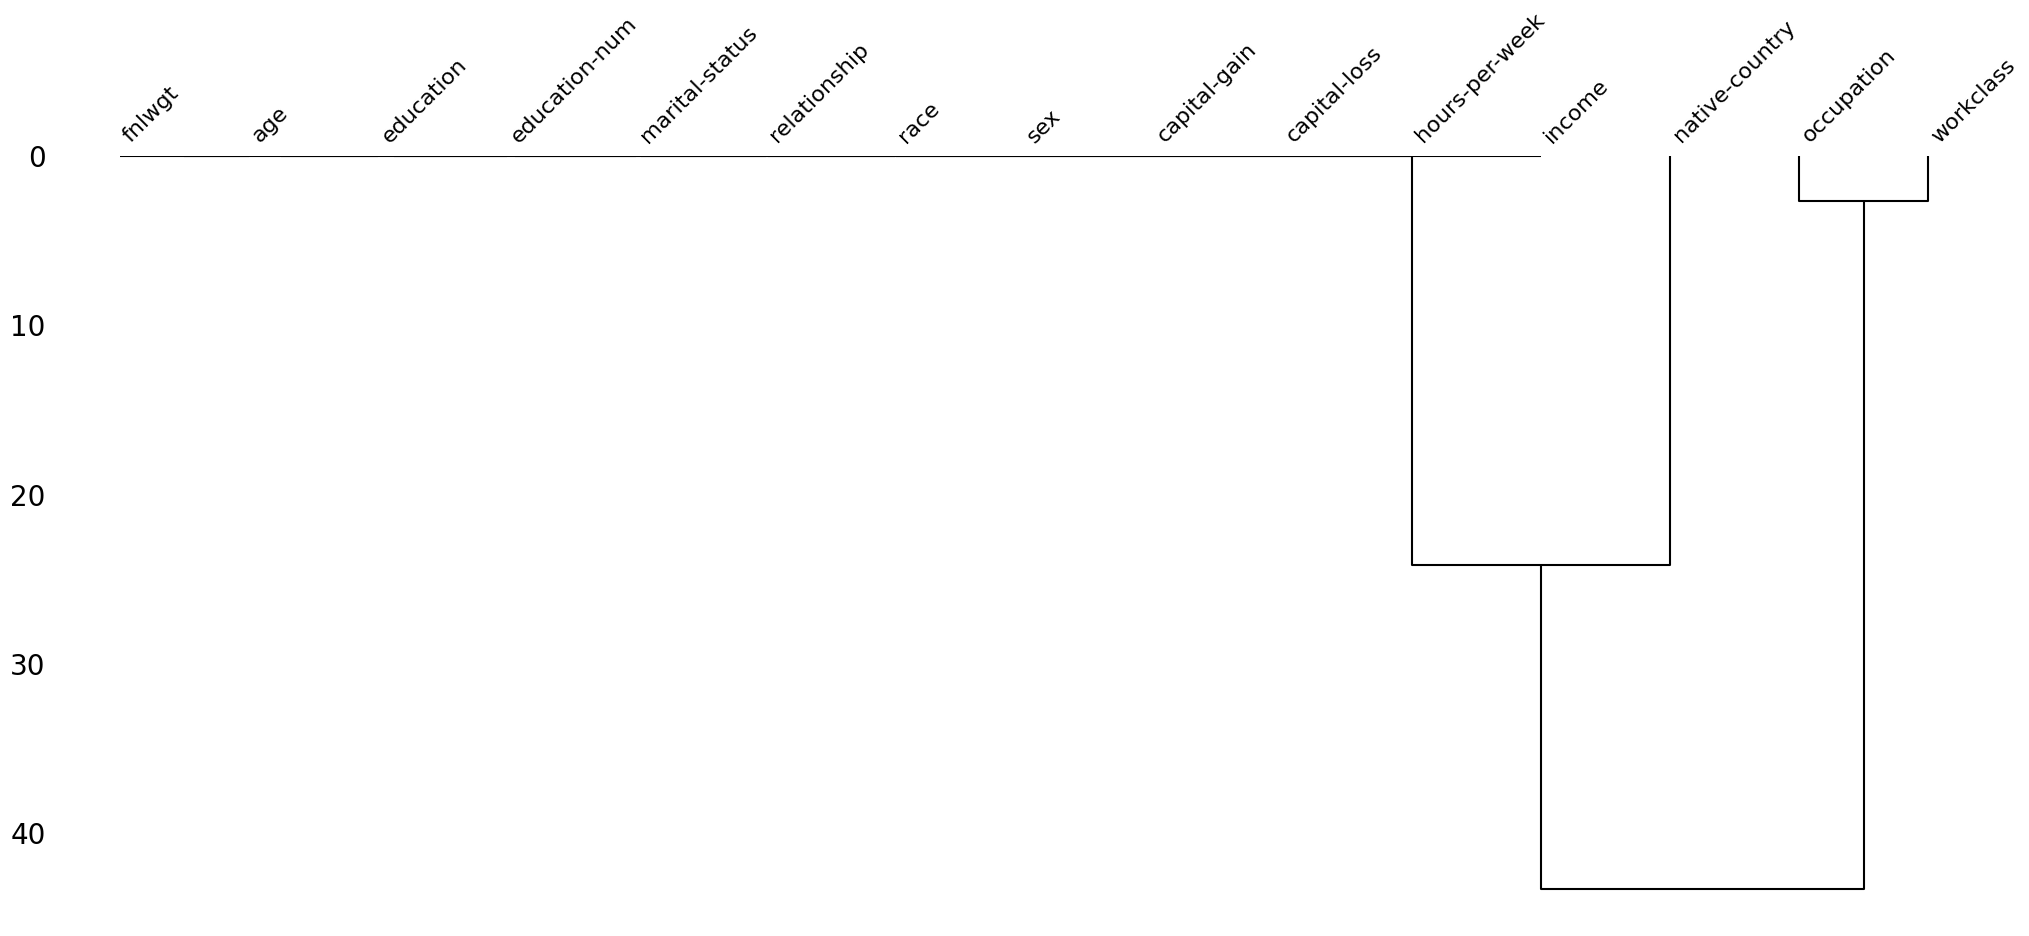

In [57]:
msno.dendrogram(adult_df)

From the adult data dendogram, all columns are separate clusters except occupation and workclass that form a cluster at level 1-10 and hours-per-week and native country which form at level 10-20. These two are then again clubbed at level beyond 40.

<Axes: >

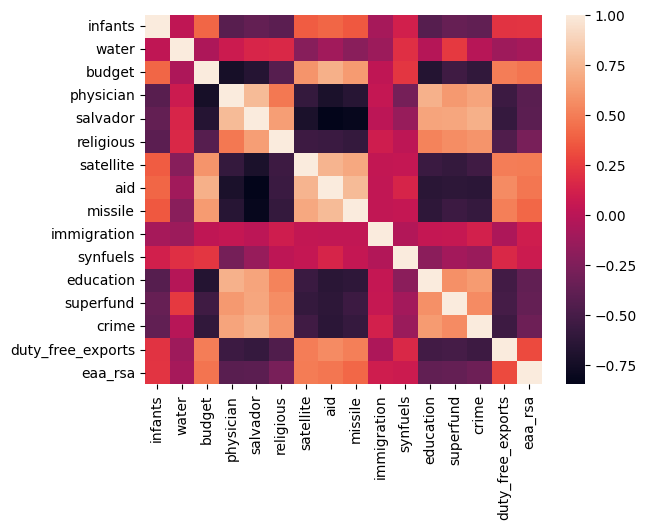

In [71]:
#------------Q2-voting records data--------------
import missingno as msno
import seaborn as sns
corr = voting_records_df1.corr() 
sns.heatmap(corr)

From the heatmap of house voting groups, salvador and aid seem highly correlated as that cell is coloured dark, whereas physician and education seem very less correlated.

<Axes: >

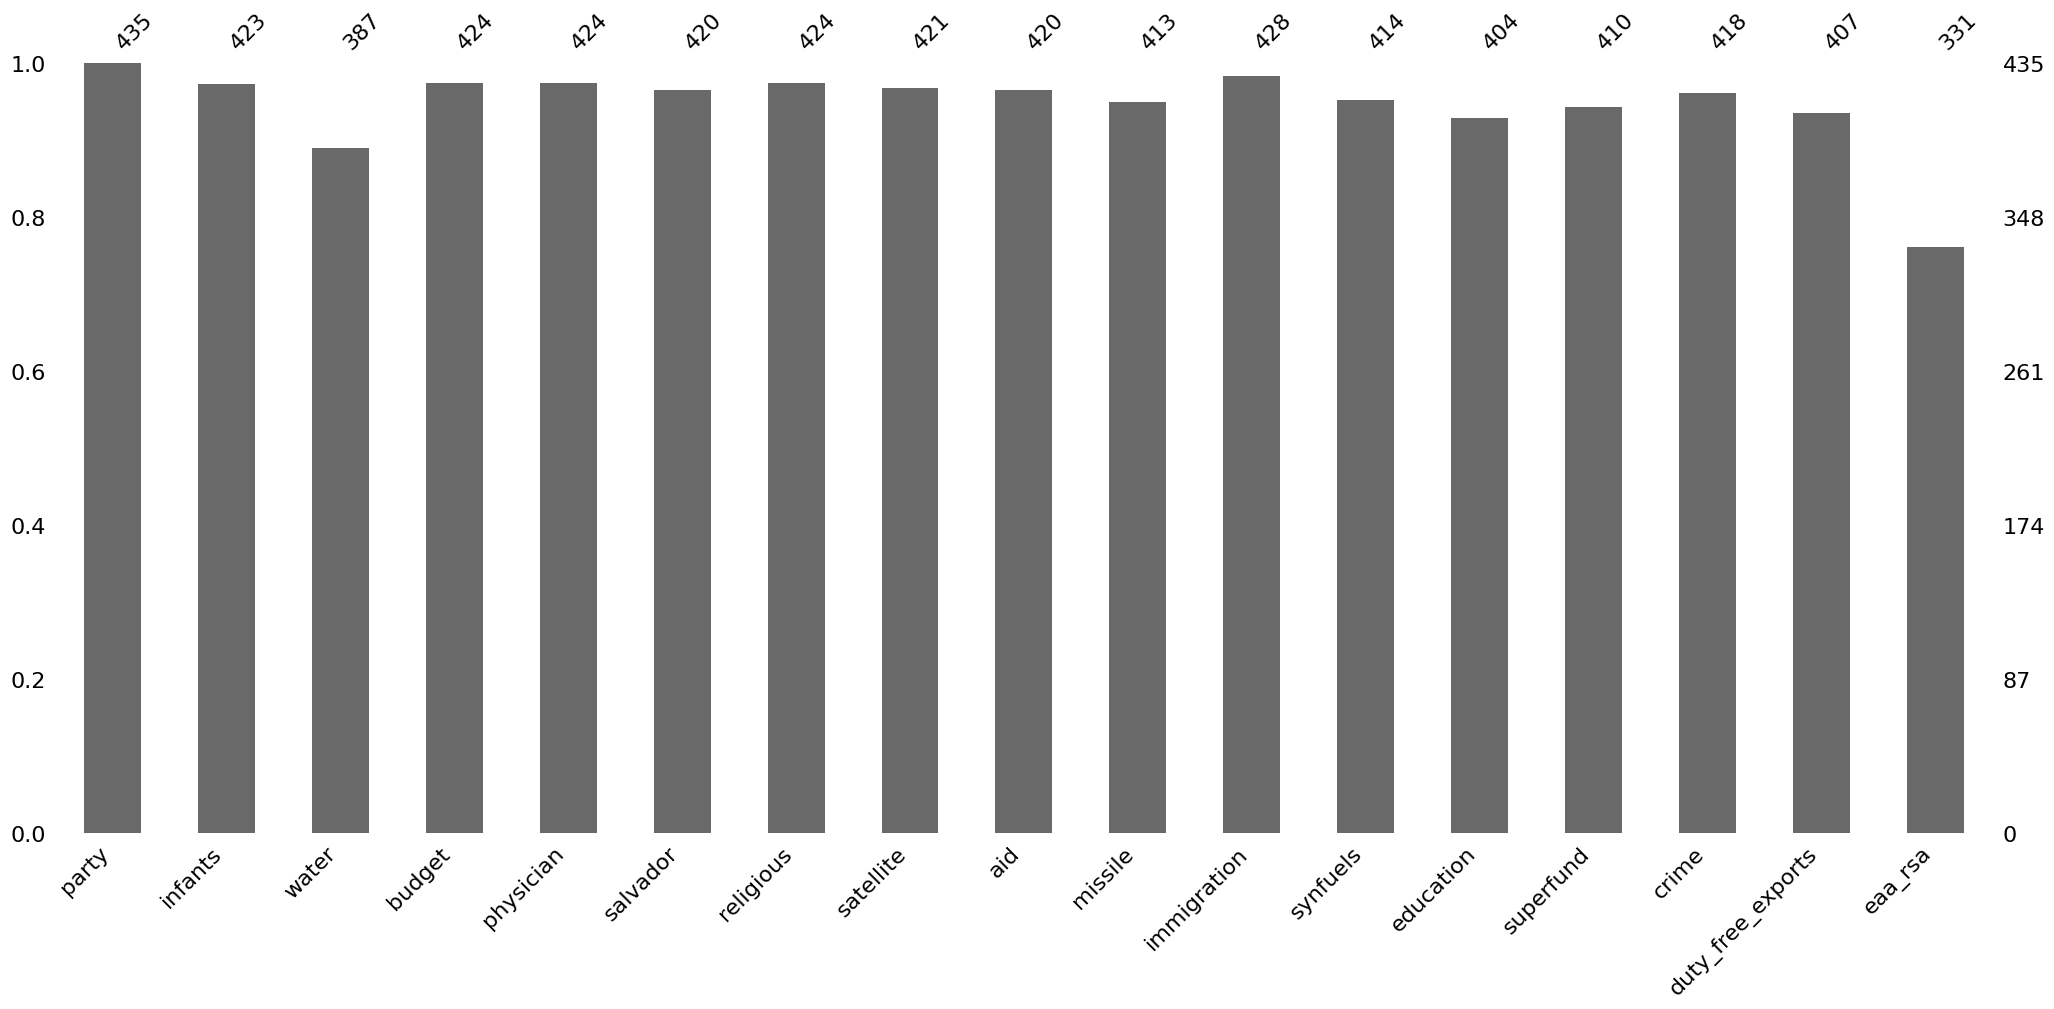

In [72]:
msno.bar(voting_records_df)

For house votes bar plot, missing values can be interpreted column wise by the height of the bar. we can see that eaa_rsa has maximum missing values and party with minimum missing values.

<Axes: >

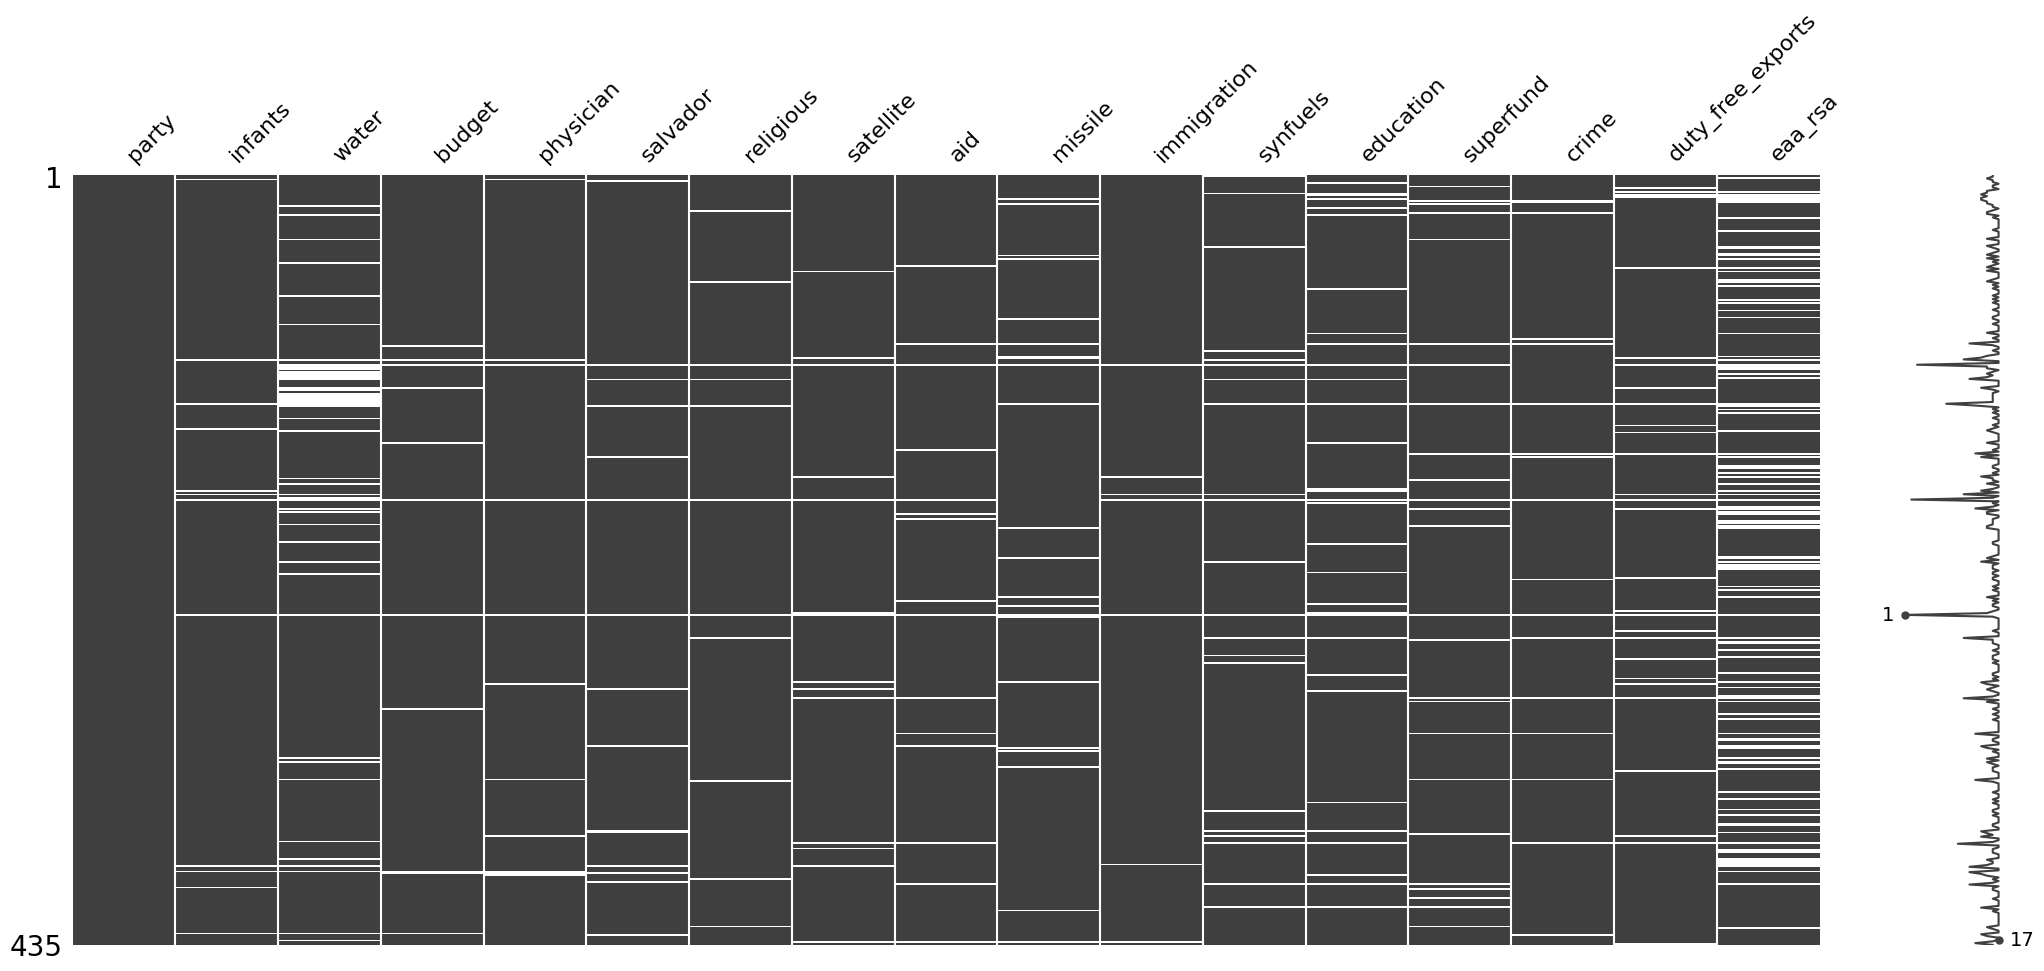

In [73]:
msno.matrix(voting_records_df)

For the house votes matrix plot, many missing values are there that can be seen by the white horizontal lines. Also, party doesn't seem to have any missing value.

<Axes: >

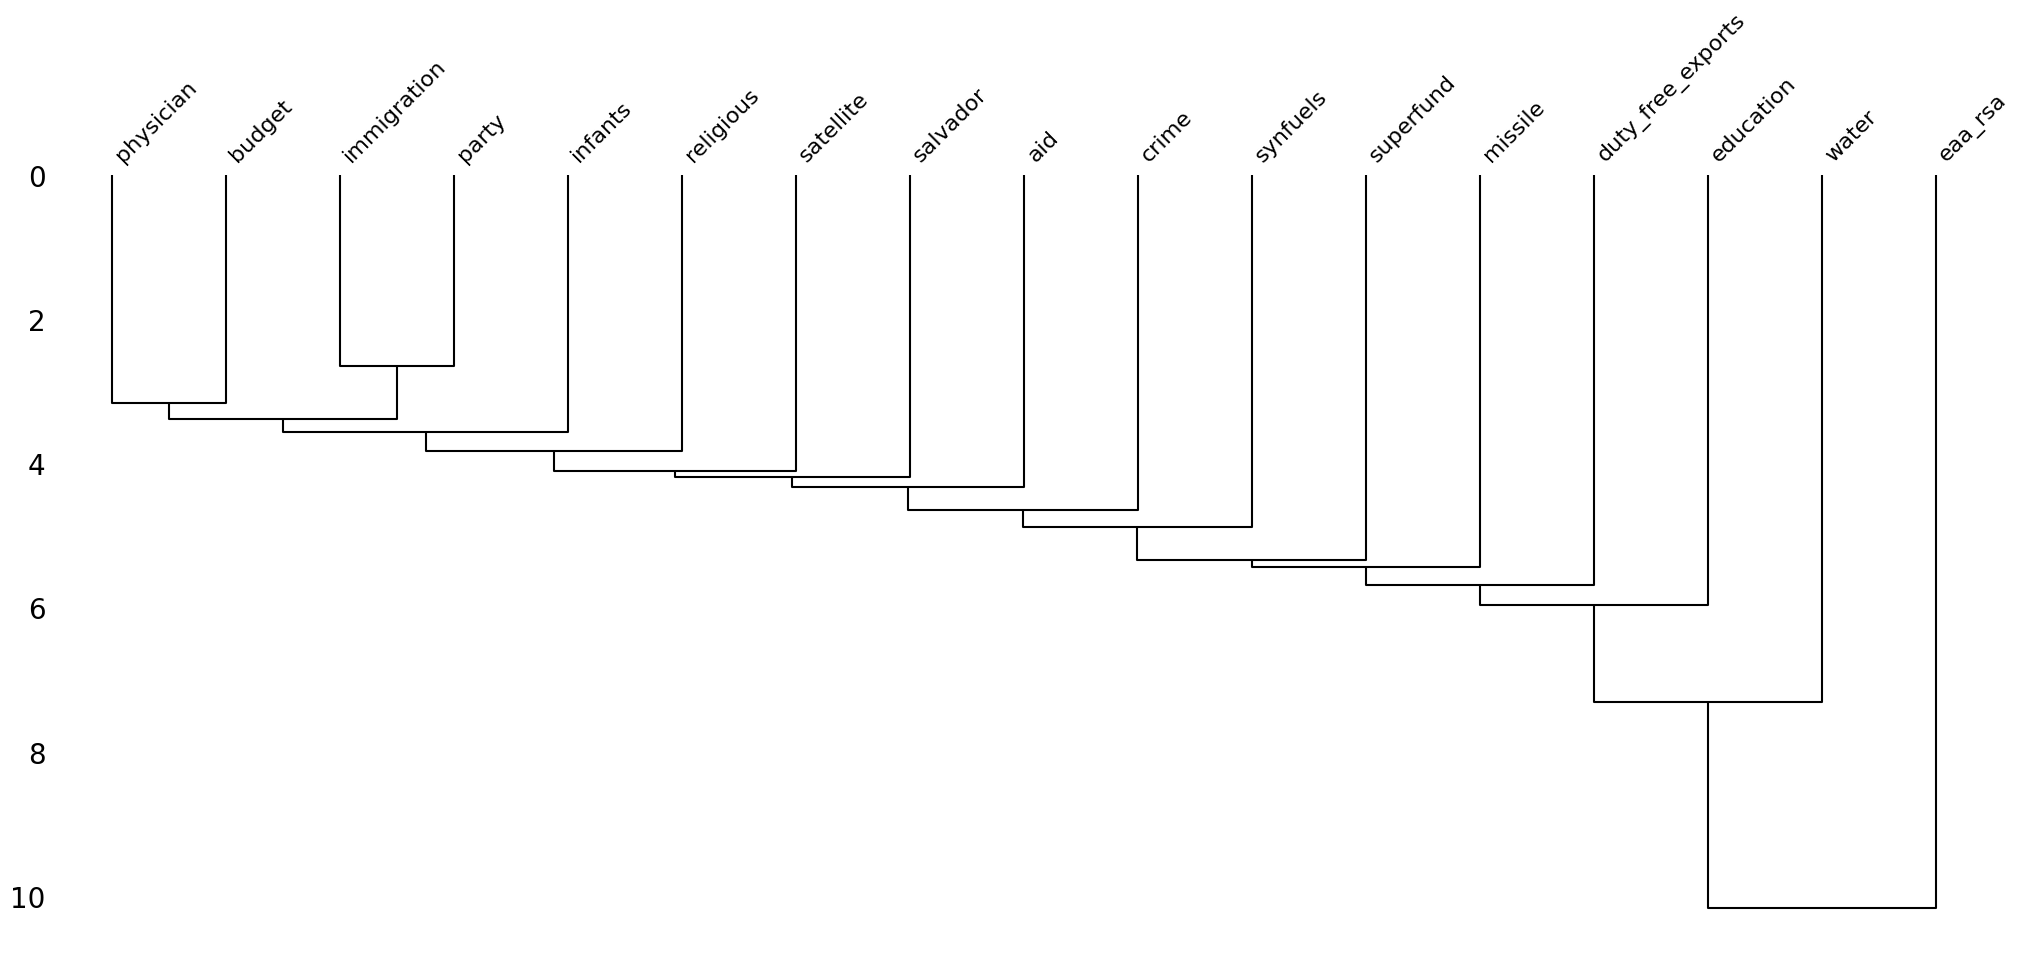

In [74]:
msno.dendrogram(voting_records_df)

In this dendogram for voting groups, as we go upwards from level 10 towards 1, more and more separate clusters are formed and can be seen. At the inital level, immigration and party are two separate clusters but then they are grouped as one cluster at about level 3.